In [46]:
import json, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.models import Model
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SpatialDropout1D
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Input
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.utils import class_weight
from keras.layers import Concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [48]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [50]:
tf.test.is_gpu_available(
    cuda_only=True, min_cuda_compute_capability=None
)

True

In [2]:
#INLADEN DATAFRAME NA PREPROCCESING
dataset=pd.DataFrame()
dataset = pd.read_pickle('WeGroupProject/verzekeringdataset.pkl')

In [100]:
damage_type = list(dataset["labels.damage_type"].value_counts().index.tolist())
ass_type = list(dataset["labels.assignment_type"].value_counts().index.tolist())
case_type = list(dataset["labels.case_type"].value_counts().index.tolist())
sub_case_type = list(dataset["labels.sub_case_type"].value_counts().index.tolist())
index = 1
onehot_dataset = pd.DataFrame(columns =  ["labels.damage_type", "labels.assignment_type", "labels.case_type",'labels.sub_case_type',"index"])
for x in damage_type: 
    for y in ass_type:
        for z in case_type:
            for a in sub_case_type:
                print(f"{x} {y} {z} {a} {index}")
                onehot_dataset.loc[-1] = [x, y,z, a, index]
                onehot_dataset.index = onehot_dataset.index +1
                index += 1

WaterDamage Bilateral Property Fire 1
WaterDamage Bilateral Property Operations 2
WaterDamage Bilateral Property Familial 3
WaterDamage Bilateral Property _PrivateClaim 4
WaterDamage Bilateral Property Other 5
WaterDamage Bilateral Property Auto 6
WaterDamage Bilateral Property ProductLiability 7
WaterDamage Bilateral Property Taxation 8
WaterDamage Bilateral Property BA_Auto 9
WaterDamage Bilateral Property MachineBreakdown 10
WaterDamage Bilateral Property ABR 11
WaterDamage Bilateral Property LegalCounsel 12
WaterDamage Bilateral Property BA_Operations 13
WaterDamage Bilateral Property BA_Familial 14
WaterDamage Bilateral Property Omnium 15
WaterDamage Bilateral Liability Fire 16
WaterDamage Bilateral Liability Operations 17
WaterDamage Bilateral Liability Familial 18
WaterDamage Bilateral Liability _PrivateClaim 19
WaterDamage Bilateral Liability Other 20
WaterDamage Bilateral Liability Auto 21
WaterDamage Bilateral Liability ProductLiability 22
WaterDamage Bilateral Liability Taxa

Other_DamageType Unilateral Property Other 185
Other_DamageType Unilateral Property Auto 186
Other_DamageType Unilateral Property ProductLiability 187
Other_DamageType Unilateral Property Taxation 188
Other_DamageType Unilateral Property BA_Auto 189
Other_DamageType Unilateral Property MachineBreakdown 190
Other_DamageType Unilateral Property ABR 191
Other_DamageType Unilateral Property LegalCounsel 192
Other_DamageType Unilateral Property BA_Operations 193
Other_DamageType Unilateral Property BA_Familial 194
Other_DamageType Unilateral Property Omnium 195
Other_DamageType Unilateral Liability Fire 196
Other_DamageType Unilateral Liability Operations 197
Other_DamageType Unilateral Liability Familial 198
Other_DamageType Unilateral Liability _PrivateClaim 199
Other_DamageType Unilateral Liability Other 200
Other_DamageType Unilateral Liability Auto 201
Other_DamageType Unilateral Liability ProductLiability 202
Other_DamageType Unilateral Liability Taxation 203
Other_DamageType Unilater

Storm Bilateral Property Operations 362
Storm Bilateral Property Familial 363
Storm Bilateral Property _PrivateClaim 364
Storm Bilateral Property Other 365
Storm Bilateral Property Auto 366
Storm Bilateral Property ProductLiability 367
Storm Bilateral Property Taxation 368
Storm Bilateral Property BA_Auto 369
Storm Bilateral Property MachineBreakdown 370
Storm Bilateral Property ABR 371
Storm Bilateral Property LegalCounsel 372
Storm Bilateral Property BA_Operations 373
Storm Bilateral Property BA_Familial 374
Storm Bilateral Property Omnium 375
Storm Bilateral Liability Fire 376
Storm Bilateral Liability Operations 377
Storm Bilateral Liability Familial 378
Storm Bilateral Liability _PrivateClaim 379
Storm Bilateral Liability Other 380
Storm Bilateral Liability Auto 381
Storm Bilateral Liability ProductLiability 382
Storm Bilateral Liability Taxation 383
Storm Bilateral Liability BA_Auto 384
Storm Bilateral Liability MachineBreakdown 385
Storm Bilateral Liability ABR 386
Storm Bilater

Fire_Smoke_Explosion Unilateral Liability MachineBreakdown 565
Fire_Smoke_Explosion Unilateral Liability ABR 566
Fire_Smoke_Explosion Unilateral Liability LegalCounsel 567
Fire_Smoke_Explosion Unilateral Liability BA_Operations 568
Fire_Smoke_Explosion Unilateral Liability BA_Familial 569
Fire_Smoke_Explosion Unilateral Liability Omnium 570
Fire_Smoke_Explosion Unilateral Investigation Fire 571
Fire_Smoke_Explosion Unilateral Investigation Operations 572
Fire_Smoke_Explosion Unilateral Investigation Familial 573
Fire_Smoke_Explosion Unilateral Investigation _PrivateClaim 574
Fire_Smoke_Explosion Unilateral Investigation Other 575
Fire_Smoke_Explosion Unilateral Investigation Auto 576
Fire_Smoke_Explosion Unilateral Investigation ProductLiability 577
Fire_Smoke_Explosion Unilateral Investigation Taxation 578
Fire_Smoke_Explosion Unilateral Investigation BA_Auto 579
Fire_Smoke_Explosion Unilateral Investigation MachineBreakdown 580
Fire_Smoke_Explosion Unilateral Investigation ABR 581
Fi

Electricity Bilateral Investigation BA_Auto 759
Electricity Bilateral Investigation MachineBreakdown 760
Electricity Bilateral Investigation ABR 761
Electricity Bilateral Investigation LegalCounsel 762
Electricity Bilateral Investigation BA_Operations 763
Electricity Bilateral Investigation BA_Familial 764
Electricity Bilateral Investigation Omnium 765
Electricity Bilateral Automotive Fire 766
Electricity Bilateral Automotive Operations 767
Electricity Bilateral Automotive Familial 768
Electricity Bilateral Automotive _PrivateClaim 769
Electricity Bilateral Automotive Other 770
Electricity Bilateral Automotive Auto 771
Electricity Bilateral Automotive ProductLiability 772
Electricity Bilateral Automotive Taxation 773
Electricity Bilateral Automotive BA_Auto 774
Electricity Bilateral Automotive MachineBreakdown 775
Electricity Bilateral Automotive ABR 776
Electricity Bilateral Automotive LegalCounsel 777
Electricity Bilateral Automotive BA_Operations 778
Electricity Bilateral Automotive

CracksAndTears Unilateral Investigation Taxation 938
CracksAndTears Unilateral Investigation BA_Auto 939
CracksAndTears Unilateral Investigation MachineBreakdown 940
CracksAndTears Unilateral Investigation ABR 941
CracksAndTears Unilateral Investigation LegalCounsel 942
CracksAndTears Unilateral Investigation BA_Operations 943
CracksAndTears Unilateral Investigation BA_Familial 944
CracksAndTears Unilateral Investigation Omnium 945
CracksAndTears Unilateral Automotive Fire 946
CracksAndTears Unilateral Automotive Operations 947
CracksAndTears Unilateral Automotive Familial 948
CracksAndTears Unilateral Automotive _PrivateClaim 949
CracksAndTears Unilateral Automotive Other 950
CracksAndTears Unilateral Automotive Auto 951
CracksAndTears Unilateral Automotive ProductLiability 952
CracksAndTears Unilateral Automotive Taxation 953
CracksAndTears Unilateral Automotive BA_Auto 954
CracksAndTears Unilateral Automotive MachineBreakdown 955
CracksAndTears Unilateral Automotive ABR 956
CracksAn

Vandalism Unilateral Property _PrivateClaim 1144
Vandalism Unilateral Property Other 1145
Vandalism Unilateral Property Auto 1146
Vandalism Unilateral Property ProductLiability 1147
Vandalism Unilateral Property Taxation 1148
Vandalism Unilateral Property BA_Auto 1149
Vandalism Unilateral Property MachineBreakdown 1150
Vandalism Unilateral Property ABR 1151
Vandalism Unilateral Property LegalCounsel 1152
Vandalism Unilateral Property BA_Operations 1153
Vandalism Unilateral Property BA_Familial 1154
Vandalism Unilateral Property Omnium 1155
Vandalism Unilateral Liability Fire 1156
Vandalism Unilateral Liability Operations 1157
Vandalism Unilateral Liability Familial 1158
Vandalism Unilateral Liability _PrivateClaim 1159
Vandalism Unilateral Liability Other 1160
Vandalism Unilateral Liability Auto 1161
Vandalism Unilateral Liability ProductLiability 1162
Vandalism Unilateral Liability Taxation 1163
Vandalism Unilateral Liability BA_Auto 1164
Vandalism Unilateral Liability MachineBreakdow

Statement Bilateral Property BA_Operations 1333
Statement Bilateral Property BA_Familial 1334
Statement Bilateral Property Omnium 1335
Statement Bilateral Liability Fire 1336
Statement Bilateral Liability Operations 1337
Statement Bilateral Liability Familial 1338
Statement Bilateral Liability _PrivateClaim 1339
Statement Bilateral Liability Other 1340
Statement Bilateral Liability Auto 1341
Statement Bilateral Liability ProductLiability 1342
Statement Bilateral Liability Taxation 1343
Statement Bilateral Liability BA_Auto 1344
Statement Bilateral Liability MachineBreakdown 1345
Statement Bilateral Liability ABR 1346
Statement Bilateral Liability LegalCounsel 1347
Statement Bilateral Liability BA_Operations 1348
Statement Bilateral Liability BA_Familial 1349
Statement Bilateral Liability Omnium 1350
Statement Bilateral Investigation Fire 1351
Statement Bilateral Investigation Operations 1352
Statement Bilateral Investigation Familial 1353
Statement Bilateral Investigation _PrivateClaim

Theft Unilateral Liability Taxation 1523
Theft Unilateral Liability BA_Auto 1524
Theft Unilateral Liability MachineBreakdown 1525
Theft Unilateral Liability ABR 1526
Theft Unilateral Liability LegalCounsel 1527
Theft Unilateral Liability BA_Operations 1528
Theft Unilateral Liability BA_Familial 1529
Theft Unilateral Liability Omnium 1530
Theft Unilateral Investigation Fire 1531
Theft Unilateral Investigation Operations 1532
Theft Unilateral Investigation Familial 1533
Theft Unilateral Investigation _PrivateClaim 1534
Theft Unilateral Investigation Other 1535
Theft Unilateral Investigation Auto 1536
Theft Unilateral Investigation ProductLiability 1537
Theft Unilateral Investigation Taxation 1538
Theft Unilateral Investigation BA_Auto 1539
Theft Unilateral Investigation MachineBreakdown 1540
Theft Unilateral Investigation ABR 1541
Theft Unilateral Investigation LegalCounsel 1542
Theft Unilateral Investigation BA_Operations 1543
Theft Unilateral Investigation BA_Familial 1544
Theft Unilat

NaturalDisaster Bilateral Property Omnium 1695
NaturalDisaster Bilateral Liability Fire 1696
NaturalDisaster Bilateral Liability Operations 1697
NaturalDisaster Bilateral Liability Familial 1698
NaturalDisaster Bilateral Liability _PrivateClaim 1699
NaturalDisaster Bilateral Liability Other 1700
NaturalDisaster Bilateral Liability Auto 1701
NaturalDisaster Bilateral Liability ProductLiability 1702
NaturalDisaster Bilateral Liability Taxation 1703
NaturalDisaster Bilateral Liability BA_Auto 1704
NaturalDisaster Bilateral Liability MachineBreakdown 1705
NaturalDisaster Bilateral Liability ABR 1706
NaturalDisaster Bilateral Liability LegalCounsel 1707
NaturalDisaster Bilateral Liability BA_Operations 1708
NaturalDisaster Bilateral Liability BA_Familial 1709
NaturalDisaster Bilateral Liability Omnium 1710
NaturalDisaster Bilateral Investigation Fire 1711
NaturalDisaster Bilateral Investigation Operations 1712
NaturalDisaster Bilateral Investigation Familial 1713
NaturalDisaster Bilateral I

Lightning Unilateral Liability _PrivateClaim 1879
Lightning Unilateral Liability Other 1880
Lightning Unilateral Liability Auto 1881
Lightning Unilateral Liability ProductLiability 1882
Lightning Unilateral Liability Taxation 1883
Lightning Unilateral Liability BA_Auto 1884
Lightning Unilateral Liability MachineBreakdown 1885
Lightning Unilateral Liability ABR 1886
Lightning Unilateral Liability LegalCounsel 1887
Lightning Unilateral Liability BA_Operations 1888
Lightning Unilateral Liability BA_Familial 1889
Lightning Unilateral Liability Omnium 1890
Lightning Unilateral Investigation Fire 1891
Lightning Unilateral Investigation Operations 1892
Lightning Unilateral Investigation Familial 1893
Lightning Unilateral Investigation _PrivateClaim 1894
Lightning Unilateral Investigation Other 1895
Lightning Unilateral Investigation Auto 1896
Lightning Unilateral Investigation ProductLiability 1897
Lightning Unilateral Investigation Taxation 1898
Lightning Unilateral Investigation BA_Auto 189

Solvency Bilateral Property Operations 2042
Solvency Bilateral Property Familial 2043
Solvency Bilateral Property _PrivateClaim 2044
Solvency Bilateral Property Other 2045
Solvency Bilateral Property Auto 2046
Solvency Bilateral Property ProductLiability 2047
Solvency Bilateral Property Taxation 2048
Solvency Bilateral Property BA_Auto 2049
Solvency Bilateral Property MachineBreakdown 2050
Solvency Bilateral Property ABR 2051
Solvency Bilateral Property LegalCounsel 2052
Solvency Bilateral Property BA_Operations 2053
Solvency Bilateral Property BA_Familial 2054
Solvency Bilateral Property Omnium 2055
Solvency Bilateral Liability Fire 2056
Solvency Bilateral Liability Operations 2057
Solvency Bilateral Liability Familial 2058
Solvency Bilateral Liability _PrivateClaim 2059
Solvency Bilateral Liability Other 2060
Solvency Bilateral Liability Auto 2061
Solvency Bilateral Liability ProductLiability 2062
Solvency Bilateral Liability Taxation 2063
Solvency Bilateral Liability BA_Auto 2064
So

Flooding Unilateral Property Familial 2223
Flooding Unilateral Property _PrivateClaim 2224
Flooding Unilateral Property Other 2225
Flooding Unilateral Property Auto 2226
Flooding Unilateral Property ProductLiability 2227
Flooding Unilateral Property Taxation 2228
Flooding Unilateral Property BA_Auto 2229
Flooding Unilateral Property MachineBreakdown 2230
Flooding Unilateral Property ABR 2231
Flooding Unilateral Property LegalCounsel 2232
Flooding Unilateral Property BA_Operations 2233
Flooding Unilateral Property BA_Familial 2234
Flooding Unilateral Property Omnium 2235
Flooding Unilateral Liability Fire 2236
Flooding Unilateral Liability Operations 2237
Flooding Unilateral Liability Familial 2238
Flooding Unilateral Liability _PrivateClaim 2239
Flooding Unilateral Liability Other 2240
Flooding Unilateral Liability Auto 2241
Flooding Unilateral Liability ProductLiability 2242
Flooding Unilateral Liability Taxation 2243
Flooding Unilateral Liability BA_Auto 2244
Flooding Unilateral Liab

SnowPressure Bilateral Property Other 2405
SnowPressure Bilateral Property Auto 2406
SnowPressure Bilateral Property ProductLiability 2407
SnowPressure Bilateral Property Taxation 2408
SnowPressure Bilateral Property BA_Auto 2409
SnowPressure Bilateral Property MachineBreakdown 2410
SnowPressure Bilateral Property ABR 2411
SnowPressure Bilateral Property LegalCounsel 2412
SnowPressure Bilateral Property BA_Operations 2413
SnowPressure Bilateral Property BA_Familial 2414
SnowPressure Bilateral Property Omnium 2415
SnowPressure Bilateral Liability Fire 2416
SnowPressure Bilateral Liability Operations 2417
SnowPressure Bilateral Liability Familial 2418
SnowPressure Bilateral Liability _PrivateClaim 2419
SnowPressure Bilateral Liability Other 2420
SnowPressure Bilateral Liability Auto 2421
SnowPressure Bilateral Liability ProductLiability 2422
SnowPressure Bilateral Liability Taxation 2423
SnowPressure Bilateral Liability BA_Auto 2424
SnowPressure Bilateral Liability MachineBreakdown 2425


BA_Building Bilateral Automotive BA_Auto 2574
BA_Building Bilateral Automotive MachineBreakdown 2575
BA_Building Bilateral Automotive ABR 2576
BA_Building Bilateral Automotive LegalCounsel 2577
BA_Building Bilateral Automotive BA_Operations 2578
BA_Building Bilateral Automotive BA_Familial 2579
BA_Building Bilateral Automotive Omnium 2580
BA_Building Unilateral Property Fire 2581
BA_Building Unilateral Property Operations 2582
BA_Building Unilateral Property Familial 2583
BA_Building Unilateral Property _PrivateClaim 2584
BA_Building Unilateral Property Other 2585
BA_Building Unilateral Property Auto 2586
BA_Building Unilateral Property ProductLiability 2587
BA_Building Unilateral Property Taxation 2588
BA_Building Unilateral Property BA_Auto 2589
BA_Building Unilateral Property MachineBreakdown 2590
BA_Building Unilateral Property ABR 2591
BA_Building Unilateral Property LegalCounsel 2592
BA_Building Unilateral Property BA_Operations 2593
BA_Building Unilateral Property BA_Familial 25

TradingLoss Bilateral Property Taxation 2768
TradingLoss Bilateral Property BA_Auto 2769
TradingLoss Bilateral Property MachineBreakdown 2770
TradingLoss Bilateral Property ABR 2771
TradingLoss Bilateral Property LegalCounsel 2772
TradingLoss Bilateral Property BA_Operations 2773
TradingLoss Bilateral Property BA_Familial 2774
TradingLoss Bilateral Property Omnium 2775
TradingLoss Bilateral Liability Fire 2776
TradingLoss Bilateral Liability Operations 2777
TradingLoss Bilateral Liability Familial 2778
TradingLoss Bilateral Liability _PrivateClaim 2779
TradingLoss Bilateral Liability Other 2780
TradingLoss Bilateral Liability Auto 2781
TradingLoss Bilateral Liability ProductLiability 2782
TradingLoss Bilateral Liability Taxation 2783
TradingLoss Bilateral Liability BA_Auto 2784
TradingLoss Bilateral Liability MachineBreakdown 2785
TradingLoss Bilateral Liability ABR 2786
TradingLoss Bilateral Liability LegalCounsel 2787
TradingLoss Bilateral Liability BA_Operations 2788
TradingLoss Bil

BoatDamage Unilateral Property Other 2945
BoatDamage Unilateral Property Auto 2946
BoatDamage Unilateral Property ProductLiability 2947
BoatDamage Unilateral Property Taxation 2948
BoatDamage Unilateral Property BA_Auto 2949
BoatDamage Unilateral Property MachineBreakdown 2950
BoatDamage Unilateral Property ABR 2951
BoatDamage Unilateral Property LegalCounsel 2952
BoatDamage Unilateral Property BA_Operations 2953
BoatDamage Unilateral Property BA_Familial 2954
BoatDamage Unilateral Property Omnium 2955
BoatDamage Unilateral Liability Fire 2956
BoatDamage Unilateral Liability Operations 2957
BoatDamage Unilateral Liability Familial 2958
BoatDamage Unilateral Liability _PrivateClaim 2959
BoatDamage Unilateral Liability Other 2960
BoatDamage Unilateral Liability Auto 2961
BoatDamage Unilateral Liability ProductLiability 2962
BoatDamage Unilateral Liability Taxation 2963
BoatDamage Unilateral Liability BA_Auto 2964
BoatDamage Unilateral Liability MachineBreakdown 2965
BoatDamage Unilateral

SituationSettlement Unilateral Automotive Familial 3108
SituationSettlement Unilateral Automotive _PrivateClaim 3109
SituationSettlement Unilateral Automotive Other 3110
SituationSettlement Unilateral Automotive Auto 3111
SituationSettlement Unilateral Automotive ProductLiability 3112
SituationSettlement Unilateral Automotive Taxation 3113
SituationSettlement Unilateral Automotive BA_Auto 3114
SituationSettlement Unilateral Automotive MachineBreakdown 3115
SituationSettlement Unilateral Automotive ABR 3116
SituationSettlement Unilateral Automotive LegalCounsel 3117
SituationSettlement Unilateral Automotive BA_Operations 3118
SituationSettlement Unilateral Automotive BA_Familial 3119
SituationSettlement Unilateral Automotive Omnium 3120


In [101]:
onehot_dataset['labels.damage_type'] = onehot_dataset['labels.damage_type']
onehot_dataset['labels.assignment_type'] = onehot_dataset['labels.assignment_type']
onehot_dataset['labels.case_type'] = onehot_dataset['labels.case_type']
onehot_dataset['labels.sub_case_type'] = onehot_dataset['labels.sub_case_type']
dataset = dataset.merge(onehot_dataset, on=['labels.assignment_type','labels.case_type','labels.sub_case_type',"labels.damage_type"])

In [103]:
dataset['index']

0        137
1        137
2        137
3        137
4        137
        ... 
3668     266
3669     901
3670     901
3671     901
3672    2641
Name: index, Length: 3673, dtype: object

In [4]:
top_amount = 6
list_top_label_sub = list(dataset["labels.sub_case_type"].value_counts()[:top_amount].index.tolist())
print(list_top_label_sub)
dataset = dataset[dataset["labels.sub_case_type"].isin(list_top_label_sub)]

['Fire', 'Operations', 'Familial', '_PrivateClaim', 'Other', 'Auto']


In [5]:
top_amount = 6
list_top_label_damage = list(dataset["labels.damage_type"].value_counts()[:top_amount].index.tolist())
print(list_top_label_damage)
dataset = dataset[dataset["labels.damage_type"].isin(list_top_label_damage)]

['WaterDamage', 'Other_DamageType', 'Collision', 'Storm', 'Fire_Smoke_Explosion', 'GlassBreakage']


In [6]:
label_list = [ "Electricity",
        "Storm",
        "WaterDamage",
        "Other_DamageType",
        "CracksAndTears",
        "GlassBreakage",
        "Collision",
        "Burglary",
        "Fire_Smoke_Explosion",
        "Theft",
        "Environment_OilFuel",
        "Flooding",]
dataset = dataset[dataset["labels.damage_type"].isin(label_list)]

In [7]:
n=500
dataset=dataset.set_index(['language', 'mail_content','labels.assignment_type','labels.case_type','labels.sub_case_type','labels.damage_type','attachments_filename'])['attachments_content'].str.split().apply(
               lambda x: pd.Series([' '.join(x[i:i+n]) for i in range(0, len(x), n)])
            ).stack().reset_index().drop('level_7', 1)
dataset.columns = [*dataset.columns[:-1], 'attachments_content']

In [8]:
y=dataset[['labels.case_type','labels.sub_case_type','labels.damage_type','labels.assignment_type']]
X=dataset.drop(['labels.case_type','labels.sub_case_type','labels.damage_type','labels.assignment_type','language'], axis=1)

In [9]:
y['labels.case_type'].unique()

array(['Liability', 'Property', 'Automotive'], dtype=object)

In [10]:
onehot_dataset

NameError: name 'onehot_dataset' is not defined

In [11]:
y.shape

(9161, 4)

In [31]:
rowy

labels.case_type                 Liability
labels.sub_case_type            Operations
labels.damage_type        Other_DamageType
labels.assignment_type          Unilateral
Name: 10112, dtype: object

In [47]:
type(new_dataset)

list

In [48]:
#new_dataset = np.array(new_dataset)

In [12]:
#Voor 6 samples

y['labels.assignment_type'].replace({'Bilateral':0,'Unilateral':1},inplace=True)
y['labels.case_type'].replace({'Liability':0,'Property':1,'Automotive':2},inplace=True)
y['labels.damage_type'].replace({"Storm":0,
        "WaterDamage":1,
        "Other_DamageType":2,
        "GlassBreakage":3,
        "Collision":4,
        "Fire_Smoke_Explosion":5},inplace=True)
y['labels.sub_case_type'].replace({'Fire':0, 'Operations':1, 'Familial':2, '_PrivateClaim':3, 'Other':4, 'Auto':5},inplace=True)

C:\Users\Ewoud\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [170]:
y['labels.assignment_type'].replace({'Bilateral':0,'Unilateral':1},inplace=True)
y['labels.case_type'].replace({'Liability':0,'Property':1,'Automotive':2},inplace=True)
y['labels.damage_type'].replace({ "Electricity":0,
        "Storm":1,
        "WaterDamage":2,
        "Other_DamageType":3,
        "CracksAndTears":4,
        "GlassBreakage":5,
        "Collision":6,
        "Burglary":7,
        "Fire_Smoke_Explosion":8,
        "Theft":9,
        "Environment_OilFuel":10,
        "Flooding":11},inplace=True)
y['labels.sub_case_type'].replace({'Fire':0, 'Operations':1, 'Familial':2, '_PrivateClaim':3, 'Other':4, 'Auto':5, 'ProductLiability':6, 'Taxation':7, 'ABR':8, 'MachineBreakdown':9},inplace=True)

C:\Users\Ewoud\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
pd.set_option('display.max_colwidth', 100)
X.head()

,mail_content,attachments_filename,attachments_content
0,br mardi septembre concerne sinistre sans contactons qualit trouverez annexe document relatif s...,VIVIUM GL C301909620 C36 Inspection - DM 2020-09-08 via agt oa bijkomende info foto's,cas dommage materiel si rue royale expert num ro dossier compagnie gestionnaire date sinistre co...
1,bijlage wij document betrekking opdracht toevertrouwd verdediging onze belangen present electro...,MISSION_ASSIGNEMENT mail makelaar - aangifte waterschade foto dakgoot foto dak foto buis buiten ...,nv koning bic btw verzekeringsmaatschappij toegelaten nbb bank codenummer alle beoefenen experts...
2,bijlage wij document betrekking opdracht toevertrouwd verdediging onze belangen present electro...,MISSION_ASSIGNEMENT mail makelaar - aangifte waterschade foto dakgoot foto dak foto buis buiten ...,fotos zien verduidelijking kapot goot goot kunt vinden foto afvoerbuis kunt zien doordat achter ...
3,sans mevrouw contacteren verzekeraar bijlage vindt bericht aanleiding waarbij betrokken wij vra...,Copie police 43 Recours pour la franchise contractuelle - rappel #1 43 Recours pour la franchise...,sent tue mar subject sent subject voir document bijgevoegd document auto conditions particuliere...
4,sans mevrouw contacteren verzekeraar bijlage vindt bericht aanleiding waarbij betrokken wij vra...,Copie police 43 Recours pour la franchise contractuelle - rappel #1 43 Recours pour la franchise...,salutations rapport mission sinistre destinataire local service date informex mandante expert co...


<AxesSubplot:xlabel='labels.damage_type', ylabel='count'>

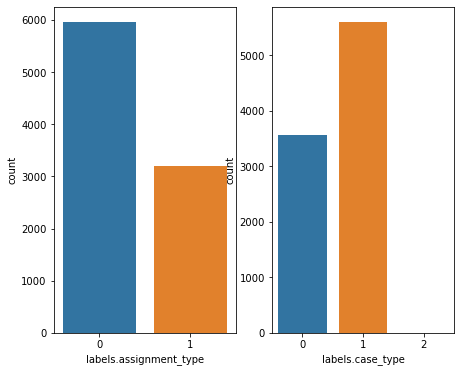

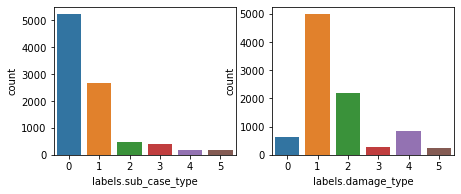

In [14]:
plt.figure(1 , figsize = (15 , 6))

plt.subplot(1 , 4 , 1)
sns.countplot(x="labels.assignment_type",data=y)
plt.subplot(1 , 4 , 2)
sns.countplot(x="labels.case_type",data=y)

plt.figure(2 , figsize = (15 , 6))
plt.subplot(2 , 4 , 1)
sns.countplot(x="labels.sub_case_type",data=y)
plt.subplot(2 , 4 , 2)
sns.countplot(x="labels.damage_type",data=y)

In [236]:
dataset = dataset[['mail_content','attachments_filename','attachments_content','labels.assignment_type','labels.case_type','labels.sub_case_type','labels.damage_type']]

In [156]:
y['labels.case_type'].unique()

array([0, 1, 2], dtype=int64)

In [5]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [214]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(dataset['labels.assignment_type'])
Y = multilabel_binarizer.transform(dataset['labels.assignment_type'])

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(dataset['mail_content'])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [140]:
y

,labels.assignment_type,labels.case_type,labels.sub_case_type,labels.damage_type
0,Bilateral,Liability,Operations,Other_DamageType
1,Unilateral,Property,Fire,WaterDamage
2,Unilateral,Property,Fire,WaterDamage
3,Bilateral,Liability,Familial,Collision
4,Bilateral,Liability,Familial,Collision
...,...,...,...,...
10108,Bilateral,Liability,Operations,Collision
10109,Bilateral,Liability,Operations,Collision
10110,Bilateral,Liability,Operations,Collision
10111,Bilateral,Liability,Operations,Collision


In [118]:
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import RandomOverSampler

# Import a dataset with X and multi-label y

lp = LabelPowerset()
ros = RandomOverSampler(random_state=42)

# Applies the above stated multi-label (ML) to multi-class (MC) transformation.
yt = lp.transform(y)

X_resampled, y_resampled = ros.fit_resample(X, yt)

# Inverts the ML-MC transformation to recreate the ML set
y_resampled = lp.inverse_transform(y_resampled)

TypeError: no supported conversion for types: (dtype('O'),)

In [15]:
#y_resampled = y_resampled.toarray()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7328, 3) (7328, 4)
(1833, 3) (1833, 4)


In [60]:
train_aug = X_train.copy()
from textattack.augmentation import EmbeddingAugmenter
aug = EmbeddingAugmenter()

train_aug['mail_content'] = train_aug['mail_content'].apply(lambda x: str(aug.augment(x)))

train = train.append(train_copy, ignore_index=True)

ModuleNotFoundError: No module named 'textattack'

In [16]:
#Max number van woorden
MAX_NB_WORDS = 50000
EMBEDDING_DIM = 100

In [17]:
#mail_content Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X['mail_content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X_train_mc = tokenizer.texts_to_sequences(X_train['mail_content'].values)
X_train_mc = pad_sequences(X_train_mc,maxlen=400)
print('Shape of data X_train_mc:', X_train_mc.shape)

X_test_mc = tokenizer.texts_to_sequences(X_test['mail_content'].values)
X_test_mc = pad_sequences(X_test_mc,maxlen=400)
print('Shape of data X_train_mc:', X_test_mc.shape)

Found 542 unique tokens.
Shape of data X_train_mc: (7328, 400)
Shape of data X_train_mc: (1833, 400)


In [18]:
#attachments_filename Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X['attachments_filename'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X_train_af = tokenizer.texts_to_sequences(X_train['attachments_filename'].values)
X_train_af = pad_sequences(X_train_af,maxlen=200)
print('Shape of data X_train_af:', X_train_af.shape)

X_test_af = tokenizer.texts_to_sequences(X_test['attachments_filename'].values)
X_test_af = pad_sequences(X_test_af,maxlen=200)
print('Shape of data X_test_af:', X_test_af.shape)

Found 14319 unique tokens.
Shape of data X_train_af: (7328, 200)
Shape of data X_test_af: (1833, 200)


In [19]:
#attachments_content Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X['attachments_content'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X_train_ac = tokenizer.texts_to_sequences(X_train['attachments_content'].values)
X_train_ac = pad_sequences(X_train_ac,maxlen=500)
print('Shape of data X_train_ac:', X_train_ac.shape)

X_test_ac = tokenizer.texts_to_sequences(X_test['attachments_content'].values)
X_test_ac = pad_sequences(X_test_ac,maxlen=500)
print('Shape of data X_train_ac:', X_test_ac.shape)

Found 41564 unique tokens.
Shape of data X_train_ac: (7328, 500)
Shape of data X_train_ac: (1833, 500)


In [20]:
print(y)

      labels.case_type  labels.sub_case_type  labels.damage_type  \
0                    0                     1                   2   
1                    1                     0                   1   
2                    1                     0                   1   
3                    0                     2                   4   
4                    0                     2                   4   
...                ...                   ...                 ...   
9156                 0                     1                   4   
9157                 0                     1                   4   
9158                 0                     1                   4   
9159                 0                     1                   4   
9160                 0                     1                   2   

      labels.assignment_type  
0                          0  
1                          1  
2                          1  
3                          0  
4                          0

In [22]:
#train & test
y1_train=y_train[['labels.assignment_type']]
y1_test=y_test[['labels.assignment_type']]
y2_train=y_train[['labels.case_type']]
y2_test=y_test[['labels.case_type']]
y3_train=y_train[['labels.sub_case_type']]
y3_test=y_test[['labels.sub_case_type']]
y4_train=y_train[['labels.damage_type']]
y4_test=y_test[['labels.damage_type']]

print('Shape of label tensor Y1 Train:', y1_train.shape)
print('Shape of label tensor Y1 Test:', y1_test.shape)
print('Shape of label tensor Y2 Train:', y2_train.shape)
print('Shape of label tensor Y2 Test:', y2_test.shape)
print('Shape of label tensor Y3 Train:', y3_train.shape)
print('Shape of label tensor Y3 Test:', y3_test.shape)
print('Shape of label tensor Y4 Train:', y4_train.shape)
print('Shape of label tensor Y4 Test:', y4_test.shape)

Shape of label tensor Y1 Train: (7328, 1)
Shape of label tensor Y1 Test: (1833, 1)
Shape of label tensor Y2 Train: (7328, 1)
Shape of label tensor Y2 Test: (1833, 1)
Shape of label tensor Y3 Train: (7328, 1)
Shape of label tensor Y3 Test: (1833, 1)
Shape of label tensor Y4 Train: (7328, 1)
Shape of label tensor Y4 Test: (1833, 1)


In [23]:
#unbalanced -> calculate balance weights
class_weights_assignment = dict(zip(np.unique(y1_train), class_weight.compute_class_weight('balanced',np.unique(y1_train),np.ravel(y1_train)))) 
print("class_weights:", class_weights_assignment)

class_weights: {0: 0.7687788501888376, 1: 1.4301327088212334}


C:\Users\Ewoud\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 1 ... 1 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [53]:
y1_train = to_categorical(y1_train)

In [41]:
iets = [y1_train,y2_train]

In [42]:
iets

[      labels.assignment_type
 7329                       0
 8653                       1
 8346                       0
 9876                       0
 9145                       1
 ...                      ...
 9225                       0
 4859                       0
 3264                       0
 9845                       1
 2732                       0
 
 [8090 rows x 1 columns],
       labels.case_type
 7329                 1
 8653                 1
 8346                 1
 9876                 1
 9145                 1
 ...                ...
 9225                 1
 4859                 1
 3264                 0
 9845                 1
 2732                 0
 
 [8090 rows x 1 columns]]

In [180]:
X

,mail_content,attachments_filename,attachments_content
0,br mardi septembre concerne sinistre sans contactons qualit trouverez annexe document relatif s...,VIVIUM GL C301909620 C36 Inspection - DM 2020-09-08 via agt oa bijkomende info foto's,cas dommage materiel si rue royale expert num ro dossier compagnie gestionnaire date sinistre co...
1,sans mevrouw contacteren verzekeraar bijlage vindt bericht aanleiding waarbij betrokken wij vra...,foto1 PV AUTO C102037543 C36 Inspectie - MS 2020-08-12,opdracht materiele schade zetel verzekeringen expert experts dossiernummer verzekeringen troch d...
2,sans mevrouw contacteren verzekeraar bijlage vindt bericht aanleiding waarbij betrokken wij vra...,PR verklaring VN + igs TP Waterlink foto's PR betwisten aub + faktuur TP VIVIUM AUTO C102111911 ...,tue subject ref schade dd klant caution email organization mevrouw mijnheer bovenstaande polls d...
3,sans mevrouw contacteren verzekeraar bijlage vindt bericht aanleiding waarbij betrokken wij vra...,PR verklaring VN + igs TP Waterlink foto's PR betwisten aub + faktuur TP VIVIUM AUTO C102111911 ...,komt leidingen beschadigd mogelijks oudere versleten leidingen tevens wel meerdere zwaardere voe...
4,sans mevrouw contacteren verzekeraar bijlage vindt bericht aanleiding waarbij wij vragen gevolg...,1440822_02-01-2021_213002107 1440910_02-01-2021_213002107 VIVIUM PR C202036075 C36 Inspectie - M...,sent subject onze ref ref mcv bv schade nv sent cc subject onze ref ref mcv bv caution email org...
...,...,...,...
10327,annexe transmettons document concernant mission confi cadre fense int ts present electronic mes...,MISSION_ASSIGNEMENT photo in mail décla photo,blvd roi ii bic tva rpm entreprise agr nationale belgique pratiquer branches blvd experts sint s...
10328,annexe transmettons document concernant mission confi cadre fense int ts present electronic mes...,MISSION_ASSIGNEMENT Declaration_Incendie_ courtier envoie déclaration MOSCHETTI - Déclaration,blvd roi ii bic tva rpm entreprise agr nationale belgique pratiquer branches blvd experts sint s...
10329,annexe transmettons document concernant mission confi cadre fense int ts present electronic mes...,MISSION_ASSIGNEMENT Declaration_Incendie_ courtier envoie déclaration MOSCHETTI - Déclaration,demande sign service protection vie priv rue cette demande accompagn copie carte mentionnera nom...
10330,annexe transmettons document concernant mission confi cadre fense int ts present electronic inf...,MISSION_ASSIGNEMENT déclaration,blvd roi ii bic tva rpm entreprise agr nationale belgique pratiquer branches blvd experts sint s...


In [187]:
#Let us try some sampling technique to remove class imbalance
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE(random_state = 101)

#X_sm, y_sm = smote.fit_resample(X_train_mc, onehot_dataset.index)
#X2_sm, y2_sm = smote.fit_resample(X_train_mc, y2_train)
#X3_sm, y3_sm = smote.fit_resample(X_train_mc, y3_train)
X4_sm, y4_sm = smote.fit_resample(X, y5_train)
print(X5_sm.shape, y5_sm.shape)

ValueError: could not convert string to float: ' br mardi septembre concerne sinistre sans contactons qualit trouverez annexe document relatif sinistre lequel demander dy apporter suites sirez plus si encore questions pouvez prendre contact br cordialement br br rue royale '

<AxesSubplot:xlabel='labels.damage_type', ylabel='count'>

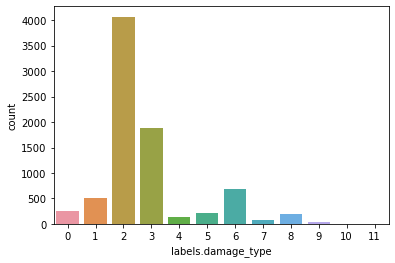

In [166]:
sns.countplot(x="labels.damage_type",data=y4_train)

In [52]:
# LSTM voor Y1_TRAIN
#adam = tf.keras.optimizers.Adam(lr=0.0001, momentum=0.9, decay=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)

# Model checkpoint
checkpoint_filepath = './LSTM_bestmodel.h5'
mc = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,save_weights_only=True, monitor='val_loss',mode='auto',save_best_only=True)

# Early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 35)

# model
input_mc = Input(shape=(400))
input_af = Input(shape=(200))
input_ac = Input(shape=(500))

model = Sequential()
embeding_mc=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_mc.shape[1])(input_mc)
embeding_af=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_af.shape[1])(input_af)
embeding_ac=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_ac.shape[1])(input_ac)

s_mc=SpatialDropout1D(0.4)(embeding_mc)
o_mc=LSTM(64, dropout=0.4)(s_mc)
s_af=SpatialDropout1D(0.4)(embeding_af)
o_af=LSTM(64, dropout=0.4)(s_af)
s_ac=SpatialDropout1D(0.4)(embeding_ac)
o_ac=LSTM(64, dropout=0.4)(s_ac)
concat_layer = Concatenate()([o_mc, o_af,o_ac])

r=Dense(32, activation='relu')(concat_layer)
lstm1 = Dense(2, activation='softmax')(r)

model = Model(inputs=[input_mc,input_af,input_ac], outputs=[lstm1])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit([X_train_mc,X_train_af,X_train_ac], y1_train, validation_split=0.2,class_weight=class_weights_assignment, epochs=100,verbose=1,batch_size=128,callbacks=[es,mc])

Epoch 1/100
46/46 [==============================] - 43s 405ms/step - loss: 0.6344 - accuracy: 0.6500 - val_loss: 0.4139 - val_accuracy: 0.8322
Epoch 2/100
46/46 [==============================] - 12s 261ms/step - loss: 0.3265 - accuracy: 0.8617 - val_loss: 0.2524 - val_accuracy: 0.9031
Epoch 3/100
46/46 [==============================] - 12s 251ms/step - loss: 0.1470 - accuracy: 0.9433 - val_loss: 0.1854 - val_accuracy: 0.9325
Epoch 4/100
46/46 [==============================] - 11s 243ms/step - loss: 0.0740 - accuracy: 0.9722 - val_loss: 0.1758 - val_accuracy: 0.9461
Epoch 5/100
46/46 [==============================] - 11s 242ms/step - loss: 0.0493 - accuracy: 0.9832 - val_loss: 0.1619 - val_accuracy: 0.9482
Epoch 6/100
46/46 [==============================] - 11s 242ms/step - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.1658 - val_accuracy: 0.9523
Epoch 7/100
46/46 [==============================] - 11s 243ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.1621 - val_accuracy:

46/46 [==============================] - 11s 247ms/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.1396 - val_accuracy: 0.9570
Epoch 58/100
46/46 [==============================] - 11s 248ms/step - loss: 0.0103 - accuracy: 0.9959 - val_loss: 0.1908 - val_accuracy: 0.9570
Epoch 59/100
46/46 [==============================] - 11s 248ms/step - loss: 0.0054 - accuracy: 0.9976 - val_loss: 0.2136 - val_accuracy: 0.9529
Epoch 60/100
46/46 [==============================] - 11s 245ms/step - loss: 0.0060 - accuracy: 0.9962 - val_loss: 0.2487 - val_accuracy: 0.9475
Epoch 61/100
46/46 [==============================] - 11s 246ms/step - loss: 0.0044 - accuracy: 0.9978 - val_loss: 0.2257 - val_accuracy: 0.9516
Epoch 62/100
46/46 [==============================] - 11s 248ms/step - loss: 0.0101 - accuracy: 0.9964 - val_loss: 0.1992 - val_accuracy: 0.9495
Epoch 63/100
46/46 [==============================] - 11s 245ms/step - loss: 0.0060 - accuracy: 0.9964 - val_loss: 0.2253 - val_accuracy: 0.951

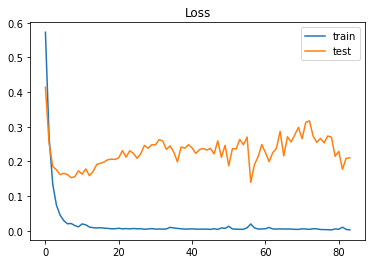

In [53]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

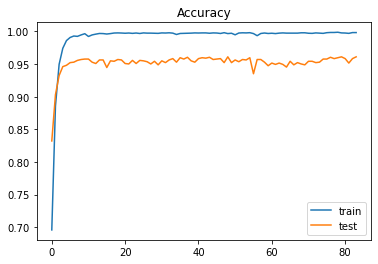

In [54]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [45]:
class_weights_case = dict(zip(np.unique(y2_train), class_weight.compute_class_weight('balanced', np.unique(y2_train), 
                np.ravel(y2_train)))) 

C:\Users\Ewoud\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2], y=[1 1 1 ... 0 1 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [46]:
class_weights_case

{0: 0.8066606840163526, 1: 0.5681977805871611, 2: 2696.6666666666665}

In [48]:
y2_train = to_categorical(y2_train)

In [56]:
y2_train

,labels.case_type
7329,1
8653,1
8346,1
9876,1
9145,1
...,...
9225,1
4859,1
3264,0
9845,1


In [55]:
# LSTM voor Y2_TRAIN
#adam = tf.keras.optimizers.Adam(lr=0.0001, momentum=0.9, decay=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Model checkpoint
checkpoint_filepath = './LSTM_bestmodel.h5'
mc = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,save_weights_only=True, monitor='val_loss',mode='auto',save_best_only=True)

# Early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 35)

# model
input_mc = Input(shape=(400))
input_af = Input(shape=(200))
input_ac = Input(shape=(500))

model = Sequential()
embeding_mc=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_mc.shape[1])(input_mc)
embeding_af=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_af.shape[1])(input_af)
embeding_ac=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_ac.shape[1])(input_ac)

s_mc=SpatialDropout1D(0.4)(embeding_mc)
o_mc=LSTM(64, dropout=0.4)(s_mc)
s_af=SpatialDropout1D(0.4)(embeding_af)
o_af=LSTM(64, dropout=0.4)(s_af)
s_ac=SpatialDropout1D(0.4)(embeding_ac)
o_ac=LSTM(64, dropout=0.4)(s_ac)
concat_layer = Concatenate()([o_mc, o_af,o_ac])
r=Dense(32, activation='relu')(concat_layer)
lstm1 = Dense(3, activation='softmax')(r)

model = Model(inputs=[input_mc,input_af,input_ac], outputs=[lstm1])
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit([X_train_mc,X_train_af,X_train_ac], y2_train, validation_split=0.2, epochs=100,verbose=1,batch_size=64,callbacks=[es], class_weight={0: 0.8066606840163526, 1: 0.5681977805871611, 2: 2.6666666666665})

Epoch 1/100
92/92 [==============================] - 41s 246ms/step - loss: 0.6937 - accuracy: 0.5962 - val_loss: 0.6524 - val_accuracy: 0.7626
Epoch 2/100
92/92 [==============================] - 21s 229ms/step - loss: 0.4054 - accuracy: 0.7428 - val_loss: 0.4843 - val_accuracy: 0.7783
Epoch 3/100
92/92 [==============================] - 20s 223ms/step - loss: 0.2913 - accuracy: 0.7932 - val_loss: 0.3364 - val_accuracy: 0.8561
Epoch 4/100
92/92 [==============================] - 21s 226ms/step - loss: 0.1929 - accuracy: 0.8769 - val_loss: 0.2539 - val_accuracy: 0.9256
Epoch 5/100
92/92 [==============================] - 20s 222ms/step - loss: 0.1365 - accuracy: 0.9322 - val_loss: 0.1972 - val_accuracy: 0.9372
Epoch 6/100
92/92 [==============================] - 20s 213ms/step - loss: 0.1063 - accuracy: 0.9474 - val_loss: 0.1584 - val_accuracy: 0.9516
Epoch 7/100
92/92 [==============================] - 20s 215ms/step - loss: 0.0868 - accuracy: 0.9604 - val_loss: 0.1466 - val_accuracy:

92/92 [==============================] - 20s 217ms/step - loss: 0.0077 - accuracy: 0.9988 - val_loss: 0.0866 - val_accuracy: 0.9795
Epoch 58/100
92/92 [==============================] - 19s 212ms/step - loss: 0.0064 - accuracy: 0.9969 - val_loss: 0.0848 - val_accuracy: 0.9829
Epoch 59/100
92/92 [==============================] - 20s 218ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0805 - val_accuracy: 0.9829
Epoch 60/100
92/92 [==============================] - 21s 224ms/step - loss: 7.6328e-04 - accuracy: 0.9998 - val_loss: 0.0811 - val_accuracy: 0.9809
Epoch 61/100
92/92 [==============================] - 20s 217ms/step - loss: 0.0028 - accuracy: 0.9986 - val_loss: 0.0986 - val_accuracy: 0.9816
Epoch 62/100
92/92 [==============================] - 27s 296ms/step - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0761 - val_accuracy: 0.9843
Epoch 63/100
92/92 [==============================] - 24s 265ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0921 - val_accuracy: 0

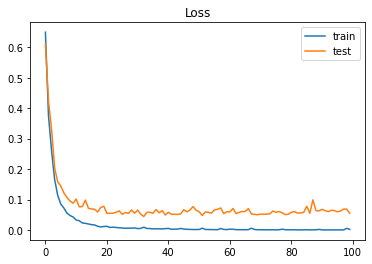

In [58]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

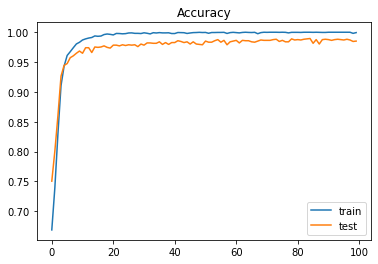

In [59]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [60]:
y3_train

,labels.sub_case_type
7329,0
8653,0
8346,0
9876,0
9145,0
...,...
9225,0
4859,0
3264,4
9845,0


In [24]:
class_weights_sub_case = dict(zip(np.unique(y3_train), class_weight.compute_class_weight('balanced', np.unique(y3_train), 
                np.ravel(y3_train)))) 

C:\Users\Ewoud\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5], y=[4 0 0 ... 0 1 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [25]:
class_weights_sub_case

{0: 0.28982755893054896,
 1: 0.5715177039463423,
 2: 3.188859878154917,
 3: 3.9525350593311757,
 4: 8.196868008948545,
 5: 8.980392156862745}

In [26]:
# LSTM voor Y3_TRAIN
#adam = tf.keras.optimizers.Adam(lr=0.0001, momentum=0.9, decay=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Model checkpoint
checkpoint_filepath = './LSTM_bestmodel.h5'
mc = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,save_weights_only=True, monitor='val_loss',mode='auto',save_best_only=True)

# Early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 35)

# model
input_mc = Input(shape=(400))
input_af = Input(shape=(200))
input_ac = Input(shape=(500))

model = Sequential()
embeding_mc=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_mc.shape[1])(input_mc)
embeding_af=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_af.shape[1])(input_af)
embeding_ac=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_ac.shape[1])(input_ac)

s_mc=SpatialDropout1D(0.4)(embeding_mc)
o_mc=LSTM(16, dropout=0.4)(s_mc)
s_af=SpatialDropout1D(0.4)(embeding_af)
o_af=LSTM(16, dropout=0.4)(s_af)
s_ac=SpatialDropout1D(0.4)(embeding_ac)
o_ac=LSTM(16, dropout=0.4)(s_ac)
concat_layer = Concatenate()([o_mc, o_af,o_ac])
# r=Dense(32, activation='relu')(concat_layer)
lstm1 = Dense(6, activation='softmax')(concat_layer)

model = Model(inputs=[input_mc,input_af,input_ac], outputs=[lstm1])
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit([X_train_mc,X_train_af,X_train_ac], y3_train, validation_split=0.2, epochs=100,verbose=1,batch_size=64,callbacks=[es], class_weight={0: 0.28982755893054896,1: 0.5715177039463423,2: 1.188859878154917,3: 1.9525350593311757,4: 2.196868008948545,5: 2.980392156862745})

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/100
92/92 [==============================] - 115s 369ms/step - loss: 1.0053 - accuracy: 0.4213 - val_loss: 1.6852 - val_accuracy: 0.6876
Epoch 2/100
92/92 [==============================] - 25s 270ms/step - loss: 0.9668 - accuracy: 0.6847 - val_loss: 1.4410 - val_accuracy: 0.6889
Epoch 3/100
92/92 [==============================] - 25s 268ms/step - loss: 0.8563 - accuracy: 0.6826 - val_loss: 1.0675 - val_accuracy: 0.6978
Epoch 4/100
92/92 [==============================] - 24s 265ms/step - loss: 0.7982 - accuracy: 0.6965 - val_loss: 0.9416 - val_accuracy: 0.7080
Epoch 5/100
92/92 [==============================] - 24s 264ms/step - loss: 0.7288 - accuracy: 0.7293 - val_loss: 0.8200 - val_accuracy: 0.7722
Epoch 6/100
92/92 [==============================] - 25s 267ms/step - loss: 0.6679 - accuracy: 0.7813 - val_loss: 0.7335 - val_accuracy: 0.81

Epoch 55/100
92/92 [==============================] - 21s 227ms/step - loss: 0.0944 - accuracy: 0.9833 - val_loss: 0.3033 - val_accuracy: 0.9134
Epoch 56/100
92/92 [==============================] - 22s 244ms/step - loss: 0.1156 - accuracy: 0.9719 - val_loss: 0.2845 - val_accuracy: 0.9147
Epoch 57/100
92/92 [==============================] - 22s 236ms/step - loss: 0.0952 - accuracy: 0.9838 - val_loss: 0.2953 - val_accuracy: 0.9093
Epoch 58/100
92/92 [==============================] - 22s 239ms/step - loss: 0.0890 - accuracy: 0.9824 - val_loss: 0.2947 - val_accuracy: 0.9086
Epoch 59/100
92/92 [==============================] - 22s 240ms/step - loss: 0.0803 - accuracy: 0.9855 - val_loss: 0.2916 - val_accuracy: 0.9106
Epoch 60/100
92/92 [==============================] - 20s 218ms/step - loss: 0.0897 - accuracy: 0.9843 - val_loss: 0.2882 - val_accuracy: 0.9113
Epoch 61/100
92/92 [==============================] - 21s 228ms/step - loss: 0.0892 - accuracy: 0.9858 - val_loss: 0.2866 - val_ac

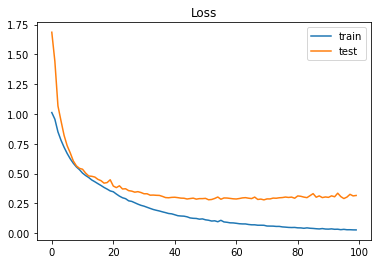

In [27]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

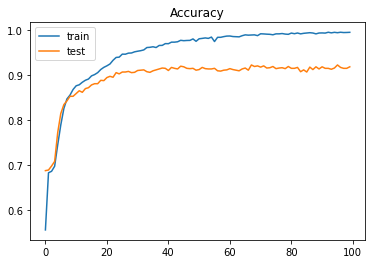

In [28]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [35]:
class_weights_damage_type = dict(zip(np.unique(y4_train), class_weight.compute_class_weight('balanced', np.unique(y4_train), 
                np.ravel(y4_train))))

C:\Users\Ewoud\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5], y=[2 0 1 ... 0 2 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [37]:
class_weights_damage_type

{0: 2.513031550068587,
 1: 0.3026848409748038,
 2: 0.7063813379602853,
 3: 5.9288025889967635,
 4: 1.806706114398422,
 5: 6.2312925170068025}

In [34]:
y4_train

,labels.damage_type
3873,2
326,0
5744,1
7988,1
6138,1
...,...
4373,1
7891,4
4859,0
3264,2


In [39]:
# LSTM voor Y4_TRAIN
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Model checkpoint
checkpoint_filepath = './LSTM_bestmodel.h5'
mc = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,save_weights_only=True, monitor='val_loss',mode='auto',save_best_only=True)

# Early stopping
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 35)

# model
input_mc = Input(shape=(400))
input_af = Input(shape=(200))
input_ac = Input(shape=(500))

model = Sequential()
embeding_mc=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_mc.shape[1])(input_mc)
embeding_af=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_af.shape[1])(input_af)
embeding_ac=Embedding(MAX_NB_WORDS, EMBEDDING_DIM,input_length=X_train_ac.shape[1])(input_ac)

s_mc=SpatialDropout1D(0.4)(embeding_mc)
o_mc=LSTM(16, dropout=0.4)(s_mc)
s_af=SpatialDropout1D(0.4)(embeding_af)
o_af=LSTM(16, dropout=0.4)(s_af)
s_ac=SpatialDropout1D(0.4)(embeding_ac)
o_ac=LSTM(16, dropout=0.4)(s_ac)
concat_layer = Concatenate()([o_mc, o_af,o_ac])
# r=Dense(32, activation='relu')(concat_layer)
lstm1 = Dense(6, activation='softmax')(concat_layer)

model = Model(inputs=[input_mc,input_af,input_ac], outputs=[lstm1])
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit([X_train_mc,X_train_af,X_train_ac], y4_train, validation_split=0.2, epochs=100,verbose=1,batch_size=64,callbacks=[es,mc],class_weight={0: 2.513031550068587,1: 0.3026848409748038,2: 0.7063813379602853,3: 3.0288025889967635,4: 1.806706114398422,5: 3.9312925170068025})

Epoch 1/100
92/92 [==============================] - 34s 249ms/step - loss: 1.5138 - accuracy: 0.2444 - val_loss: 1.7676 - val_accuracy: 0.2715
Epoch 2/100
92/92 [==============================] - 18s 196ms/step - loss: 1.5383 - accuracy: 0.3008 - val_loss: 1.7380 - val_accuracy: 0.2810
Epoch 3/100
92/92 [==============================] - 18s 199ms/step - loss: 1.4755 - accuracy: 0.3362 - val_loss: 1.7009 - val_accuracy: 0.3356
Epoch 4/100
92/92 [==============================] - 19s 209ms/step - loss: 1.4559 - accuracy: 0.3806 - val_loss: 1.6689 - val_accuracy: 0.3540
Epoch 5/100
92/92 [==============================] - 19s 210ms/step - loss: 1.3979 - accuracy: 0.4125 - val_loss: 1.5775 - val_accuracy: 0.4618
Epoch 6/100
92/92 [==============================] - 20s 222ms/step - loss: 1.3432 - accuracy: 0.5139 - val_loss: 1.4427 - val_accuracy: 0.4898
Epoch 7/100
92/92 [==============================] - 22s 236ms/step - loss: 1.2858 - accuracy: 0.5361 - val_loss: 1.3520 - val_accuracy:

92/92 [==============================] - 22s 237ms/step - loss: 0.1839 - accuracy: 0.9525 - val_loss: 0.5524 - val_accuracy: 0.8213
Epoch 58/100
92/92 [==============================] - 20s 215ms/step - loss: 0.1804 - accuracy: 0.9538 - val_loss: 0.5650 - val_accuracy: 0.8206
Epoch 59/100
92/92 [==============================] - 19s 202ms/step - loss: 0.1784 - accuracy: 0.9466 - val_loss: 0.5666 - val_accuracy: 0.8179
Epoch 60/100
92/92 [==============================] - 20s 215ms/step - loss: 0.1737 - accuracy: 0.9495 - val_loss: 0.5617 - val_accuracy: 0.8226
Epoch 61/100
92/92 [==============================] - 20s 222ms/step - loss: 0.1676 - accuracy: 0.9480 - val_loss: 0.5582 - val_accuracy: 0.8240
Epoch 62/100
92/92 [==============================] - 19s 209ms/step - loss: 0.1588 - accuracy: 0.9563 - val_loss: 0.5515 - val_accuracy: 0.8254
Epoch 63/100
92/92 [==============================] - 19s 207ms/step - loss: 0.1639 - accuracy: 0.9505 - val_loss: 0.5623 - val_accuracy: 0.826

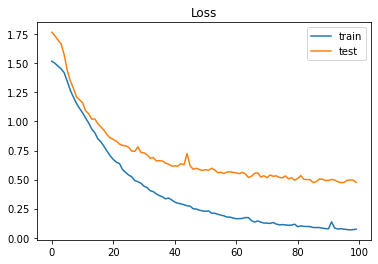

In [40]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

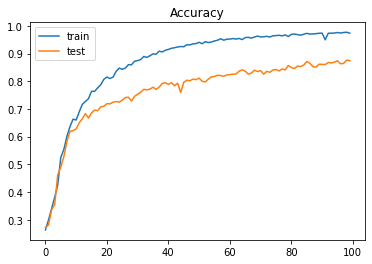

In [41]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [62]:
# Testing with the test set
# Loading the the best performing model
model.load_weights(checkpoint_filepath)
y1_pred,y2_pred,y3_pred,y4_pred = model.predict([X_test_mc,X_test_af,X_test_ac])

ValueError: Cannot assign to variable dense_10/kernel:0 due to variable shape (32, 3) and value shape (32, 2) are incompatible

In [ ]:
predictions_assign=pd.DataFrame(columns=y1_train.columns, data=(y1_pred>0.5).astype(np.int))
predictions_case=pd.DataFrame(columns=y2_train.columns, data=(y2_pred>0.5).astype(np.int))
predictions_sub_case=pd.DataFrame(columns=y3_train.columns, data=(y3_pred>0.5).astype(np.int))
predictions_damage=pd.DataFrame(columns=y4_train.columns, data=(y4_pred>0.5).astype(np.int))
result = pd.concat([X_test_original,predictions_assign, predictions_case,predictions_sub_case,predictions_damage,y_test], axis=1, join="inner")

# Testen

In [61]:
#assignment_type
y1_pred = (y1_pred > 0.5) 
y1_pred=np.argmax(y1_pred, axis=1)
y_test_cat=pd.Categorical(y_test['labels.assignment_type'])
y_test_cat=y_test_cat.codes
#case_type
y2_pred = (y2_pred > 0.5) 
y2_pred=np.argmax(y2_pred, axis=1)
y2_test_cat=pd.Categorical(y_test['labels.case_type'])
y2_test_cat=y2_test_cat.codes
#sub_case_type
y3_pred = (y3_pred > 0.5) 
y3_pred=np.argmax(y3_pred, axis=1)
y3_test_cat=pd.Categorical(y_test['labels.sub_case_type'])
y3_test_cat=y3_test_cat.codes
#damage_type
y4_pred = (y4_pred > 0.5) 
y4_pred=np.argmax(y4_pred, axis=1)
y4_test_cat=pd.Categorical(y_test['labels.damage_type'])
y4_test_cat=y4_test_cat.codes

NameError: name 'y1_pred' is not defined

In [ ]:
cf = confusion_matrix(y_test_cat,y1_pred.astype(int),labels=[1,0])
cr= classification_report(y_test_cat,y1_pred.astype(int))
print("assignment_type")
print(cr)
print(cf)
print(y_test['labels.assignment_type'].unique())

In [ ]:
cf = confusion_matrix(y2_test_cat,y2_pred.astype(int))
cr= classification_report(y2_test_cat,y2_pred.astype(int))
print("case_type")
print(cr)
print(cf)
print(y_test['labels.case_type'].unique())

In [ ]:
cf = confusion_matrix(y3_test_cat,y3_pred.astype(int))
cr= classification_report(y3_test_cat,y3_pred.astype(int))
print("case_type")
print(cr)
print(cf)
print(y_test['labels.sub_case_type'].unique())

In [ ]:
cf = confusion_matrix(y4_test_cat,y4_pred.astype(int))
cr= classification_report(y4_test_cat,y4_pred.astype(int))
print("damage_type")
print(cr)
print(cf)
print(y_test['labels.damage_type'].unique())